In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [101]:
%matplotlib inline

In [102]:
consumer_complaints = pd.read_csv("Consumer_Complaints.csv", low_memory = False)
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
3,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,05/22/2015,Navy FCU,In progress,Yes,NaN
4,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [103]:
consumer_complaints = consumer_complaints.fillna(0)

In [104]:
#resamp = consumer_complaints.set_index('Date received').resample('M', how='sum')


# Number of complaints by month

In [105]:
consumer_complaints.index = pd.to_datetime(consumer_complaints.pop("Date received"), format="%m/%d/%Y")

In [106]:
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,,,
2015-05-22,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",0,VA,22204,Web,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,0
2015-05-22,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,0,MO,63304,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,0
2015-05-22,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,0,FL,33414,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,0
2015-05-22,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",0,NC,27615,Web,05/22/2015,Navy FCU,In progress,Yes,0
2015-05-22,1388470,Consumer loan,Installment loan,Managing the loan or lease,0,MA,1474,Phone,05/22/2015,Santander Bank US,In progress,Yes,0


In [107]:
complaints_by_month = consumer_complaints.resample("M", how=["count"])[:-1]

In [108]:
complaints_by_month.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
,count,count,count,count,count,count,count,count,count,count,count,count,count
Date received,,,,,,,,,,,,,
2011-12-31,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556
2012-01-31,3266,3266,3266,3266,3266,3266,3266,3266,3266,3266,3266,3266,3266
2012-02-29,3507,3507,3507,3507,3507,3507,3507,3507,3507,3507,3507,3507,3507
2012-03-31,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247
2012-04-30,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725


In [109]:
complaints_by_month = consumer_complaints.Issue.resample("M", how=["count"])[:-1]

In [110]:
#Excluding this month, as seen
complaints_by_month.tail()

,count
Date received,
2014-12-31,11710
2015-01-31,12633
2015-02-28,12710
2015-03-31,14567
2015-04-30,13577


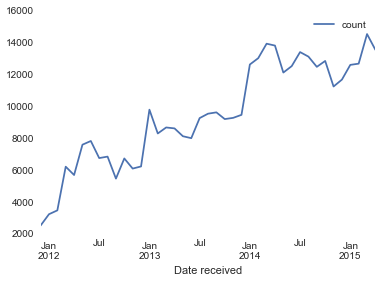

In [111]:
complaints_by_month.plot()

In [183]:
#Complaints on the rise in a linear fashion since 2012, almost quadrupeling 

#Complaint by Product

In [112]:
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,,,
2015-05-22,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",0,VA,22204,Web,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,0
2015-05-22,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,0,MO,63304,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,0
2015-05-22,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,0,FL,33414,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,0
2015-05-22,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",0,NC,27615,Web,05/22/2015,Navy FCU,In progress,Yes,0
2015-05-22,1388470,Consumer loan,Installment loan,Managing the loan or lease,0,MA,1474,Phone,05/22/2015,Santander Bank US,In progress,Yes,0


In [113]:
complaints_by_product = consumer_complaints.Product.value_counts()

In [114]:
complaints_by_product.head()

Mortgage                   146533
Debt collection             65639
Credit reporting            57299
Credit card                 49772
Bank account or service     45851
dtype: int64

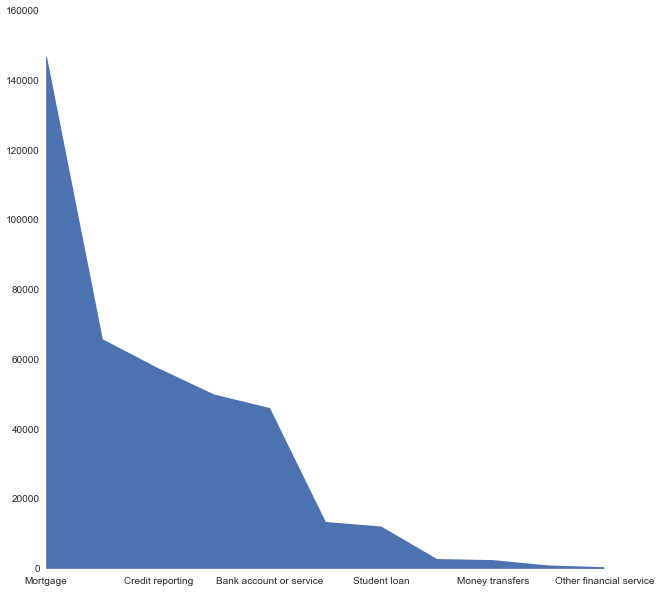

In [147]:
complaints_by_product.plot(kind='area',figsize=(10,10))

In [ ]:
Mortgage far exceeds the rest of the complaints (double of next highest complaint)

#Complaints by Company

In [122]:
complaints_by_company = consumer_complaints.Company.value_counts()

In [125]:
complaints_by_company.head()

Bank of America    46908
Wells Fargo        32992
JPMorgan Chase     26177
Experian           20190
Citibank           19578
dtype: int64

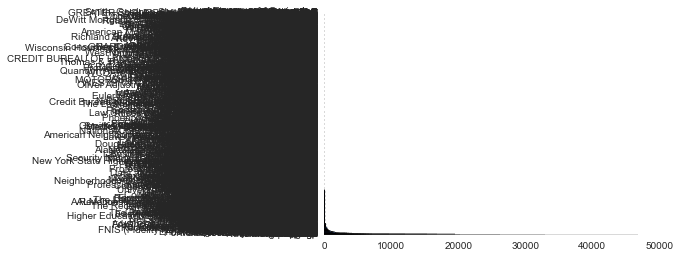

In [131]:
complaints_by_company.plot(kind = 'barh')

In [ ]:
#too many companies

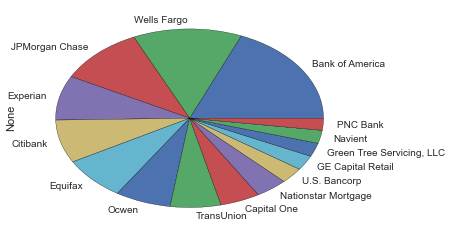

In [134]:
complaints_by_company[:15].plot(kind = 'pie')

In [ ]:
#A nice spread of some of the most complained about banks. I won't choose BOA for my next 
#credit card

#Complaints by Company Response

In [140]:
complaints_by_company_response = consumer_complaints['Company response'].value_counts()

In [141]:
complaints_by_company_response.head()

ERROR! Session/line number was not unique in database. History logging moved to new session 34


Closed with explanation            279287
Closed with non-monetary relief     50502
Closed with monetary relief         28145
Closed without relief               17909
Closed                               9599
dtype: int64

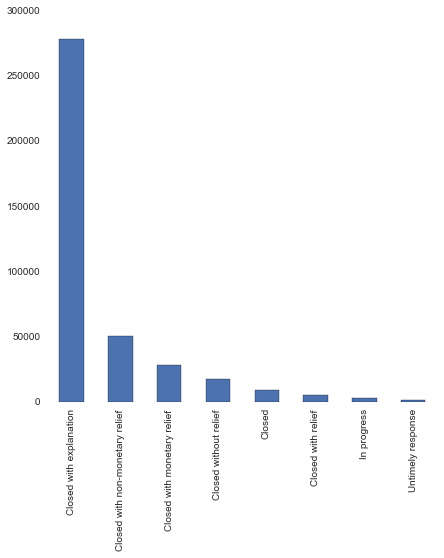

In [152]:
complaints_by_company_response[:15].plot(kind = 'bar', figsize=(7,7))

In [ ]:
#A vast majority of complaints are answered

#Mean # of complaints by day of week

In [153]:
temp = pd.DatetimeIndex(consumer_complaints['Date sent to company'])
consumer_complaints['weekday'] = temp.weekday

In [154]:
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,weekday
Date received,,,,,,,,,,,,,,
2015-05-22,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",0,VA,22204,Web,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,0,4
2015-05-22,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,0,MO,63304,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,0,4
2015-05-22,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,0,FL,33414,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,0,4
2015-05-22,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",0,NC,27615,Web,05/22/2015,Navy FCU,In progress,Yes,0,4
2015-05-22,1388470,Consumer loan,Installment loan,Managing the loan or lease,0,MA,1474,Phone,05/22/2015,Santander Bank US,In progress,Yes,0,4


In [155]:
complaints_by_day_of_week = consumer_complaints.weekday.value_counts().sort_index()


In [157]:
complaints_by_day_of_week

0    72339
1    79346
2    79834
3    75739
4    69056
5    10759
6     8780
dtype: int64

In [175]:
complaints_by_day_of_week.index = ["M", "Tu", "W", "Th", "F", "Sa", "Su"]

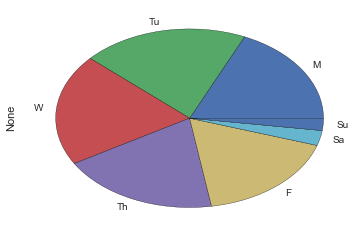

In [181]:
complaints_by_day_of_week.plot(kind = 'pie')

In [ ]:
#Very few complaints filed Sat. or Sun. relative to the rest of the week